In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

## Oscillator

In [3]:
df_tsa_plot = pd.read_csv("rosa_results/oscillator_tsa.csv")
df_csa_plot = pd.read_csv("rosa_results/oscillator_csa.csv")

In [4]:
def draw_indices(df, column, ylabel, savefile=None, is_logscale=False): 
    nb_subset = len(df["sample"].unique())
    xplot = np.arange(nb_subset)
    fig = plt.figure(figsize=(5, 4))
    for i, var in enumerate(df["variable"].unique()):
        sub_df = df[df["variable"]==var]
        if var=="ctrl.":
            plt.plot(xplot, sub_df[column].values, color=f"k", marker=".", label=var)
        else :
            plt.plot(xplot, sub_df[column].values, color=f"C{i}", marker="o", label=var)
    plt.grid()
    plt.xlabel("BANCS samples ($N=5 \\times 10^3$)")
    plt.ylabel(ylabel)
    #plt.legend(bbox_to_anchor=(1.4, 1.), loc='upper right', ncol=1)
    plt.legend(bbox_to_anchor=(0.5, -0.17), loc='upper center', ncol=4, columnspacing=1.2)
    plt.xticks(xplot, [f"$S_{i+1}$" for i in xplot])
    if is_logscale:
        plt.yscale("log") 
    if savefile is not None: 
        plt.savefig(savefile, dpi=300, bbox_inches='tight')
    return fig

In [5]:
df_tsa_plot

,variable,sample,HSIC,R2HSIC,pvalue_asymptotic,pvalue_permutation
0,$m_p$,Subset 1,2.376692e-05,0.008425,7.300712e-15,NaN
1,$m_s$,Subset 1,1.005000e-04,0.035183,1.668693e-55,NaN
2,$k_p$,Subset 1,2.178477e-04,0.078645,5.884320e-111,NaN
3,$k_s$,Subset 1,1.721391e-04,0.063095,1.896474e-106,NaN
4,$\zeta_p$,Subset 1,4.581927e-05,0.017324,3.494612e-32,NaN
...,...,...,...,...,...,...
67,$\zeta_p$,Subset 8,1.791559e-04,0.133521,2.219361e-169,NaN
68,$\zeta_s$,Subset 8,5.913850e-05,0.042758,9.420634e-72,NaN
69,$F_s$,Subset 8,1.943152e-06,0.001454,2.026919e-03,NaN
70,$S_0$,Subset 8,3.673370e-07,0.000275,1.424778e-01,NaN


''

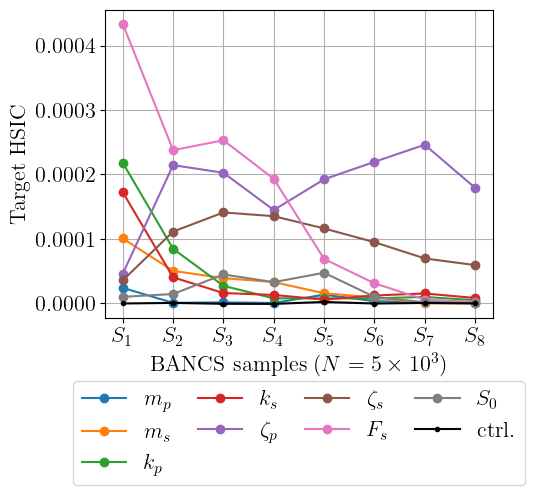

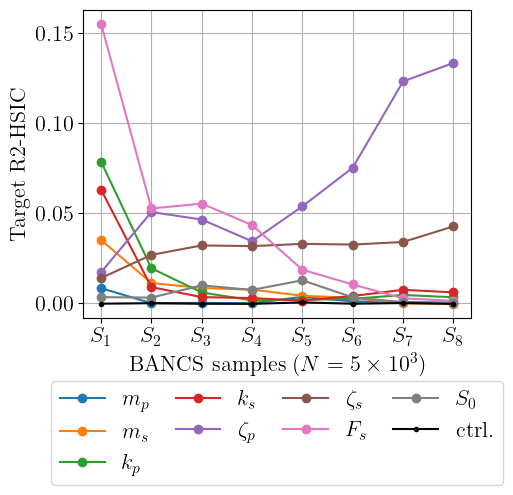

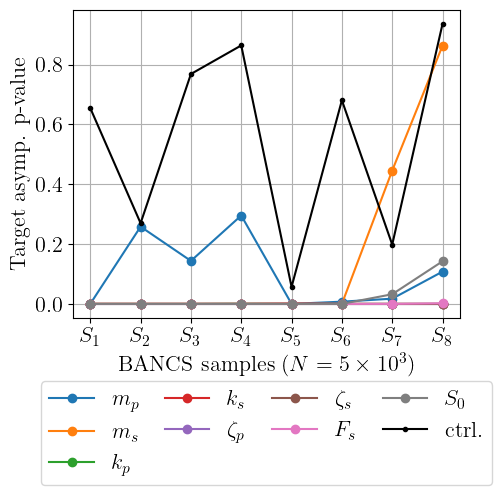

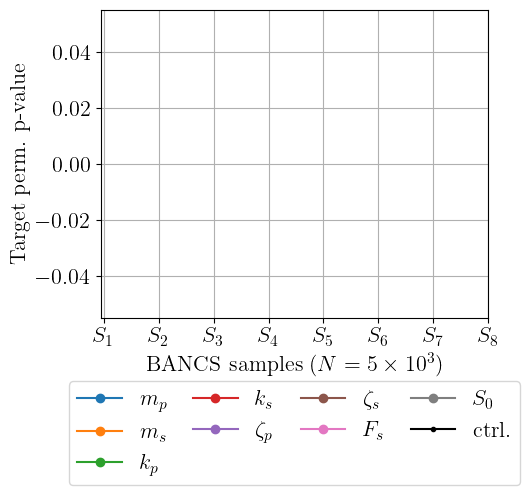

In [6]:
## TSA figures ##
# HSIC
draw_indices(df_tsa_plot, "HSIC", "Target HSIC", "rosa_figures/oscillator_THSIC.png")
# R2HSIC
draw_indices(df_tsa_plot, "R2HSIC", "Target R2-HSIC", "rosa_figures/oscillator_TR2HSIC.png")
# P-values asymptotic
draw_indices(df_tsa_plot, "pvalue_asymptotic", "Target asymp. p-value", "rosa_figures/oscillator_Tpvalue_asymptotic.png", is_logscale=False)
# P-values permutation
draw_indices(df_tsa_plot, "pvalue_permutation", "Target perm. p-value", "rosa_figures/oscillator_Tpvalue_permutation.png", is_logscale=False)
;

''

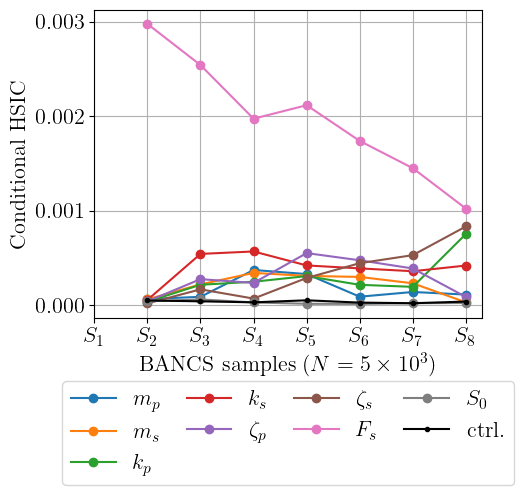

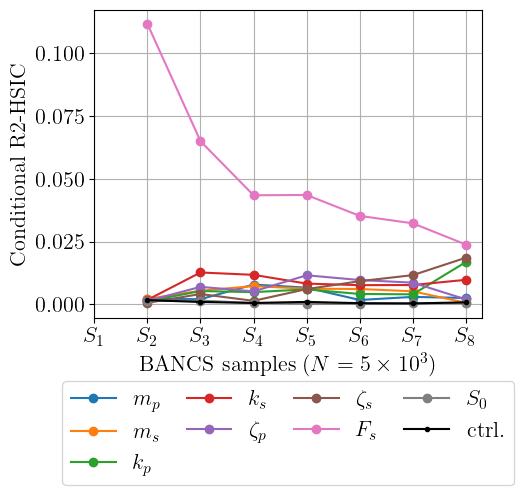

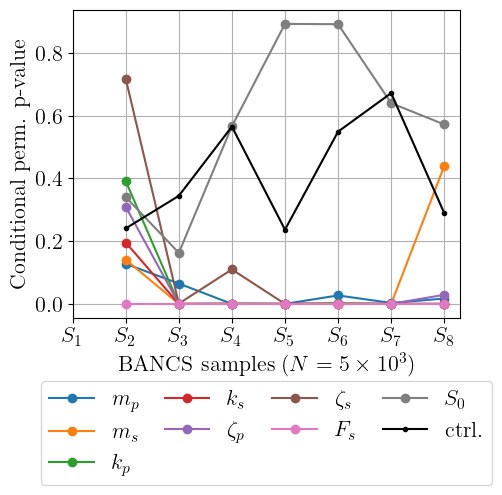

In [7]:
## CSA figures ##
# HSIC
draw_indices(df_csa_plot, "HSIC", "Conditional HSIC", "rosa_figures/oscillator_CHSIC.png")
# R2HSIC
draw_indices(df_csa_plot, "R2HSIC", "Conditional R2-HSIC", "rosa_figures/oscillator_CR2HSIC.png")
# P-values permutation
draw_indices(df_csa_plot, "pvalue_permutation", "Conditional perm. p-value", "rosa_figures/oscillator_Cpvalue_permutation.png")
;

## Ishigami

In [8]:
df_tsa_plot = pd.read_csv("rosa_results/ishigami_tsa.csv")
df_csa_plot = pd.read_csv("rosa_results/ishigami_csa.csv")
#df_csa_plot["pvalue_permutation"] = df_csa_plot["pvalue_permutation"] + 1e-10

''

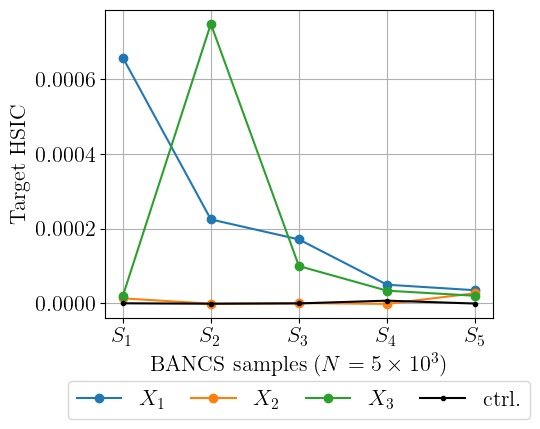

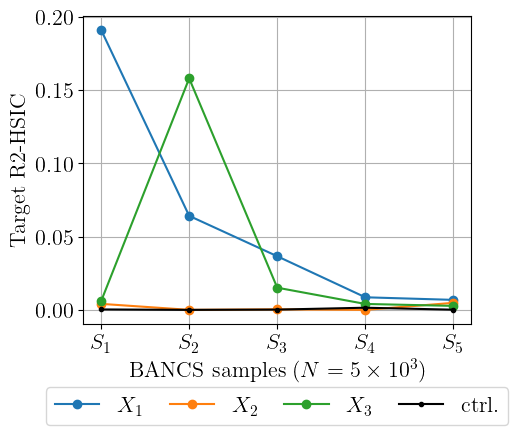

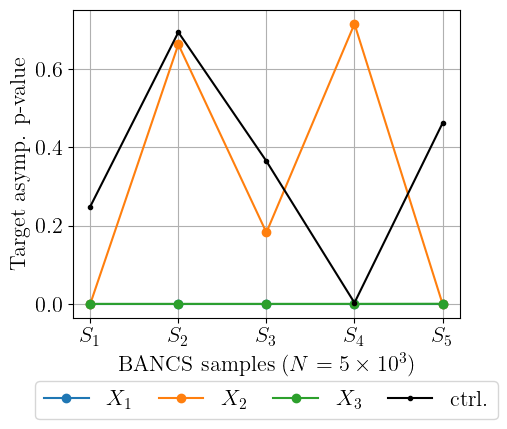

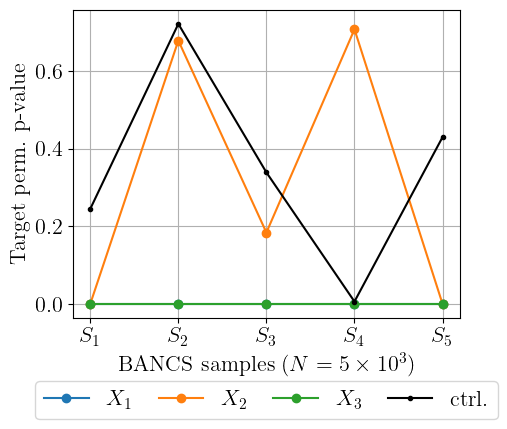

In [9]:
## TSA figures ##
# HSIC
draw_indices(df_tsa_plot, "HSIC", "Target HSIC", "rosa_figures/ishigami_THSIC.png")
# R2HSIC
draw_indices(df_tsa_plot, "R2HSIC", "Target R2-HSIC", "rosa_figures/ishigami_TR2HSIC.png")
# P-values asymptotic
draw_indices(df_tsa_plot, "pvalue_asymptotic", "Target asymp. p-value", "rosa_figures/ishigami_Tpvalue_asymptotic.png", is_logscale=False)
# P-values permutation
draw_indices(df_tsa_plot, "pvalue_permutation", "Target perm. p-value", "rosa_figures/ishigami_Tpvalue_permutation.png", is_logscale=False)
;

''

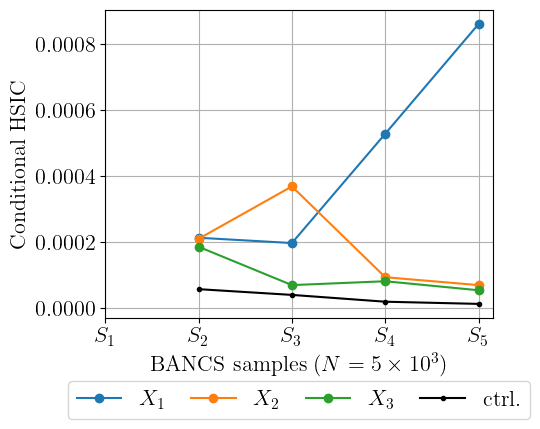

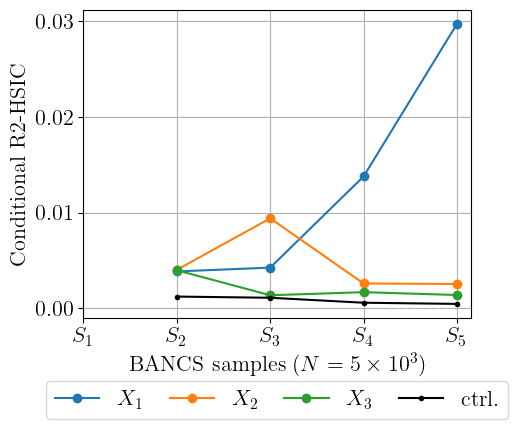

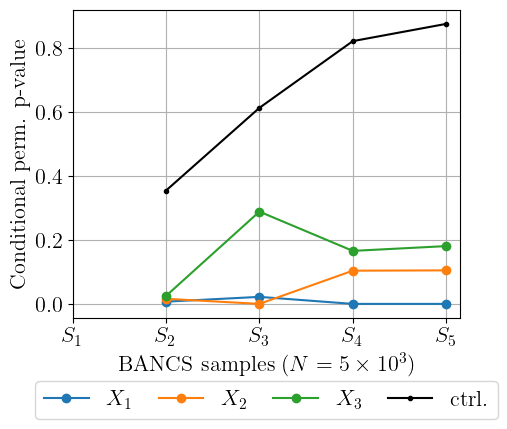

In [10]:
## CSA figures ##
# HSIC
draw_indices(df_csa_plot, "HSIC", "Conditional HSIC", "rosa_figures/ishigami_CHSIC.png")
# R2HSIC
draw_indices(df_csa_plot, "R2HSIC", "Conditional R2-HSIC", "rosa_figures/ishigami_CR2HSIC.png")
# P-values permutation
draw_indices(df_csa_plot, "pvalue_permutation", "Conditional perm. p-value", "rosa_figures/ishigami_Cpvalue_permutation.png")
;